# Shoe vs Sandal vs Boot Classification Using CNN
Aqilah Putri Alifah
1203210049 / IF 01-02
VISI KOMPUTER

Mengimpor packages yang dibutuhkan

In [25]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from PIL import Image

import tensorflow_hub as hub

In [2]:
# Mendapatkan nama nama kelas atau label dari dataset gambar Shoe vs Sandal vs Boot
data_directory = pathlib.Path('C:/Users\Aqilah\Documents/VISI KOMPUTER\TUGAS 1/Shoe vs Sandal vs Boot Dataset')
class_names = sorted([item.name for item in data_directory.glob('*')][:3])
print(class_names)

['Boot', 'Sandal', 'Shoe']


In [3]:
# Mendifinisikan variabel yang berisi jalur direktori dari tiga kelas
boot_dir = 'C:/Users\Aqilah\Documents/VISI KOMPUTER\TUGAS 1/Shoe vs Sandal vs Boot Dataset/Boot' 
sandal_dir = 'C:/Users\Aqilah\Documents/VISI KOMPUTER\TUGAS 1/Shoe vs Sandal vs Boot Dataset/Sandal'
shoe_dir ='C:/Users\Aqilah\Documents/VISI KOMPUTER\TUGAS 1/Shoe vs Sandal vs Boot Dataset/Shoe'
data_dir = 'C:/Users\Aqilah\Documents/VISI KOMPUTER\TUGAS 1/Shoe vs Sandal vs Boot Dataset'

In [4]:
# Menghitung dan mencetak jumlah gambar yang ada pada setiap kelas
boot_images = len(os.listdir(boot_dir))
sandal_images = len(os.listdir(sandal_dir))
shoe_images = len(os.listdir(shoe_dir))
print(f'Number of Boot images: {boot_images}')
print(f'Number of Sandal images: {sandal_images}')
print(f'Number of Shoe images: {shoe_images}')

Number of Boot images: 5000
Number of Sandal images: 5000
Number of Shoe images: 5000


In [5]:
# Mendefinisikan data generator untuk memproses gambar dalam dataset
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data_dir, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [6]:
# Mengambil Batch data (gambar dan label yang sesuai) dari data pelatihan
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [7]:
# Mendefinisikan fungsi untuk menampilkan 20 gambar acak dari dataset
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 10))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.show()

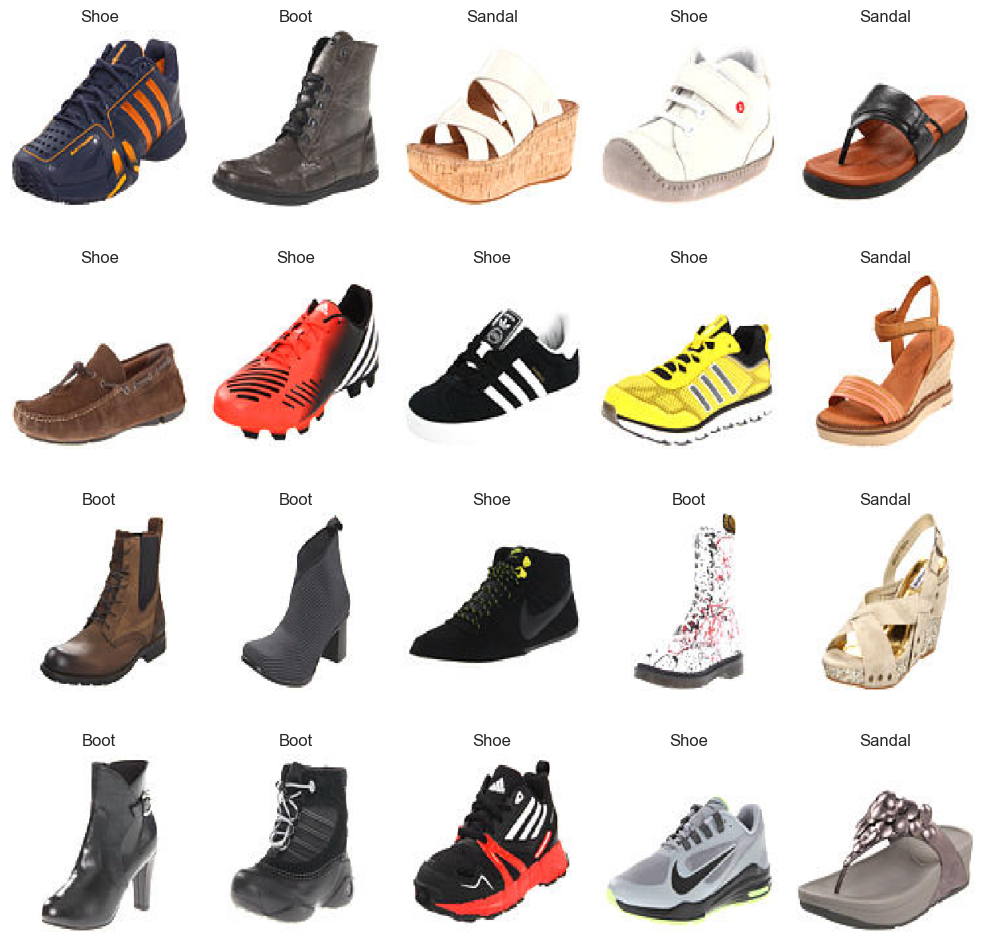

In [27]:
# Memanggil fungsi untuk menampilkan 20 gambar acak dari dataset
plot_random_images()

In [9]:
# Mencetak varibael train_data dan val_data
train_data, val_data

(<keras.src.preprocessing.image.DirectoryIterator at 0x2dc3c430a10>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x2dc14106fd0>)

Mendefinisikan model Neural Network yang menggunakan Tensorflow

In [10]:
# Membuat model
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(3, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Mencetak informasi model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
# Mendefinisikan dan mengkonfigurasi callback
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

Melatih model Neural Network. Menggunakan Tensorflow untuk melatih model dengan menggunakan 'train_data' dan melakukan validasi menggunakan 'val_data'

In [13]:
classifier = model.fit(train_data, batch_size = 32, 
                                 epochs = 12, 
                                 validation_data = val_data, 
                                 verbose = 1,
                                 callbacks = [reduce_lr])

Epoch 1/12
375/375 [==============================] - 681s 2s/step - loss: 0.4736 - accuracy: 0.8788 - val_loss: 0.1584 - val_accuracy: 0.9360 - lr: 0.0010
Epoch 2/12
375/375 [==============================] - 670s 2s/step - loss: 0.1044 - accuracy: 0.9647 - val_loss: 0.1591 - val_accuracy: 0.9463 - lr: 0.0010
Epoch 3/12
375/375 [==============================] - 661s 2s/step - loss: 0.0462 - accuracy: 0.9845 - val_loss: 0.1335 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 4/12
375/375 [==============================] - 662s 2s/step - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.1593 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 5/12
375/375 [==============================] - 657s 2s/step - loss: 0.0271 - accuracy: 0.9901 - val_loss: 0.2205 - val_accuracy: 0.9430 - lr: 0.0010
Epoch 6/12
375/375 [==============================] - 650s 2s/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.1942 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 7/12
375/375 [==============================] - 642s 2s/st

In [14]:
# Mengevaluasi model pada data validasi
model.evaluate(val_data)

94/94 [==============================] - 26s 270ms/step - loss: 0.2560 - accuracy: 0.9583


[0.25600725412368774, 0.9583333134651184]

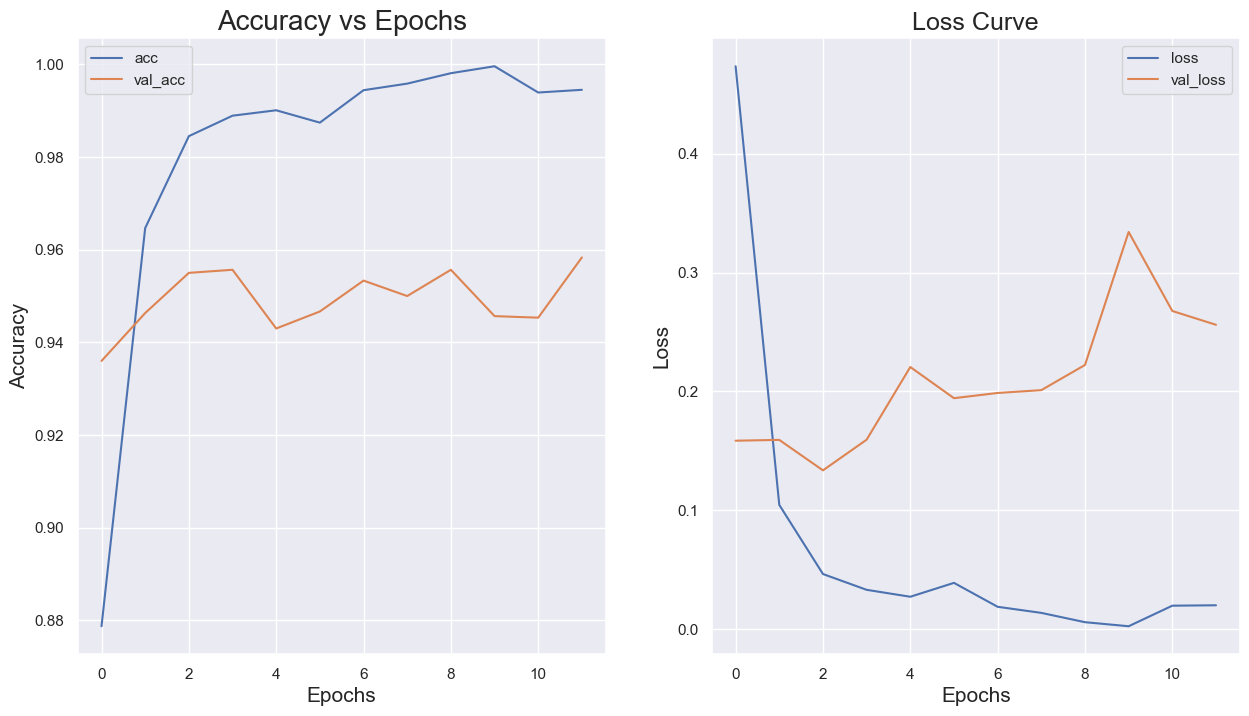

In [15]:
# Mendifinisikan fungsi untuk membuat grafik visualisasi kinerja model Neural Network selama pelatihan
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

Menyimpan model Neural Network yamg telah dilatih ke dalam file, sehingga model dapat digunakan kembali tanpa perlu melatih ulang model

In [18]:
# Menyimpan model Neural network ke dalam file
model.save('model.h5')

In [20]:
# Memuat model yang telah disimpan
loaded_model = tf.keras.models.load_model('C:/Users/Aqilah/Documents/VISI KOMPUTER/TUGAS 1/model.h5')

In [21]:
# Mendefinisikan fungsi untuk memproses gambar sebelum digunakan untuk prediksi oleh model
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

1/1 [==============================] - 1s 621ms/step


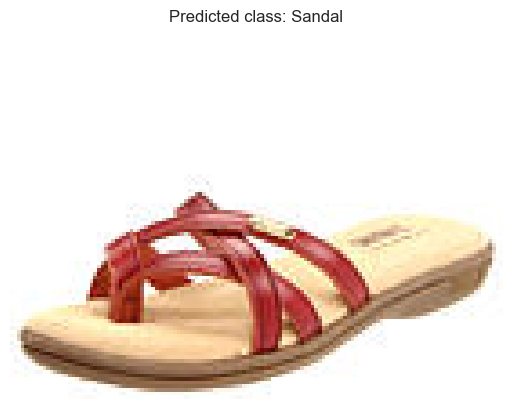

In [28]:
# Melakukan prediksi dengan model Neural Network
img_path = "C:/Users/Aqilah/Documents/VISI KOMPUTER/TUGAS 1/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (7).jpg"
img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)

class_labels = ['Boot', 'Sandal', 'Shoe']  
predicted_class_label = class_labels[predicted_class_index]

# Menampilkan gambar bersamaan dengan label kelas yang diprediksi
img = Image.open(img_path)

plt.imshow(img)
plt.title("Predicted class: " + predicted_class_label)
plt.axis('off')
plt.show()